In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from keras.utils import np_utils

from dreamUtils import *
from dreamNetworks import *

Using TensorFlow backend.


Dream Networks are ready!


## Single Channel

In [2]:
loaded = np.load('../Data/32_32_last20sec_img.npz')

In [3]:
X_train = loaded['train_img']
y_train = loaded['train_labels']

In [4]:
X_test = loaded['test_img']
y_test = loaded['test_labels']

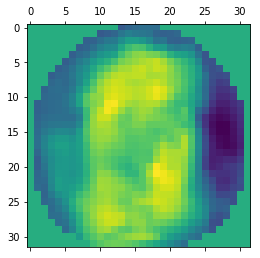

In [5]:
x_0 = X_train[0]
plt.matshow(x_0.reshape(32,-1))

In [6]:
np.max(x_0)

0.4108867549775975

In [7]:
X_train = np.array( [np.rollaxis(x,0,3) for x in X_train ] )
X_test = np.array( [np.rollaxis(x,0,3) for x in X_test ] )

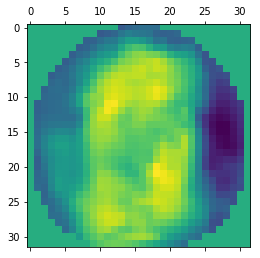

In [8]:
x_0 = X_train[0]
plt.matshow(x_0.reshape(32,-1))

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13500, 32, 32, 1) (13500, 3)
(10000, 32, 32, 1) (10000, 3)


### Model Test

In [10]:
model = CNN_Image32()

In [11]:
model.fit(X_train, y_train, epochs=3, batch_size=10, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/3
 - 113s - loss: 0.5829 - acc: 0.7389
Epoch 2/3
 - 121s - loss: 3.3413 - acc: 0.7395
Epoch 3/3
 - 124s - loss: 4.1788 - acc: 0.7407
Baseline Error: 100.00%


### Model Test Simple

In [13]:
model = Simple_CNN_Image32()

In [14]:
model.fit(X_train, y_train, epochs=3, batch_size=10, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/3
 - 50s - loss: 0.5855 - acc: 0.7398
Epoch 2/3
 - 51s - loss: 0.5771 - acc: 0.7407
Epoch 3/3
 - 50s - loss: 0.5756 - acc: 0.7407
Baseline Error: 100.00%


## Multi Channel

In [ ]:
loaded_fft = np.load('../Data/32_32_multichannel_img.npz')

In [ ]:
X_train_fft = loaded_fft['train_img']
y_train_fft = loaded_fft['train_labels']

In [ ]:
X_test_fft = loaded_fft['test_img']
y_test_fft = loaded_fft['test_labels']

In [ ]:
x_0 = X_train_fft[0][0]
plt.matshow(x_0.reshape(32,-1))

In [ ]:
X_train_fft = np.array( [np.rollaxis(x,0,3) for x in X_train_fft ] )
X_test_fft = np.array( [np.rollaxis(x,0,3) for x in X_test_fft ] )

In [ ]:
x_0 = X_train_fft[0][:,:,0]
plt.matshow(x_0.reshape(32,-1))

In [ ]:
print(X_train_fft.shape, y_train_fft.shape)
print(X_test_fft.shape, y_test_fft.shape)

In [ ]:
model = CNN_Multichannel_Image32()

In [ ]:
model.fit(X_train_fft, y_train_fft, epochs=3, batch_size=10, verbose=2,validation_split=0.1)
scores = model.evaluate(X_test_fft, y_test_fft, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))